# Linear Regression

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv("../data/rent_commute_data.csv")

# Features (X) and target (y)
X = df[['rent', 'commute_minutes']].values   # shape (n_samples, 2)
y = df['life_cost'].values.reshape(-1,1)    # shape (n_samples, 1)

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (50, 2)
y shape: (50, 1)


In [4]:
#Feature-Normalization

# Mean normalization
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_norm = (X - X_mean) / X_std

# Add bias (intercept) term
X_norm = np.hstack([np.ones((X_norm.shape[0], 1)), X_norm])

print("X_norm shape:", X_norm.shape)

X_norm shape: (50, 3)


In [5]:
# Number of features
n_features = X_norm.shape[1]

# Initialize theta (weights) with zeros
theta = np.zeros((n_features, 1))

# Learning rate
alpha = 0.01

# Number of iterations
iterations = 1000

In [6]:
#Gradient Descent

def compute_cost(X, y, theta):
    m = len(y)
    predictions = X @ theta
    cost = (1/(2*m)) * np.sum((predictions - y)**2)
    return cost

# Gradient Descent
m = len(y)
cost_history = []

for i in range(iterations):
    predictions = X_norm @ theta
    gradients = (1/m) * X_norm.T @ (predictions - y)
    theta -= alpha * gradients
    cost_history.append(compute_cost(X_norm, y, theta))

print("Final cost:", cost_history[-1])

Final cost: 835555.483925221


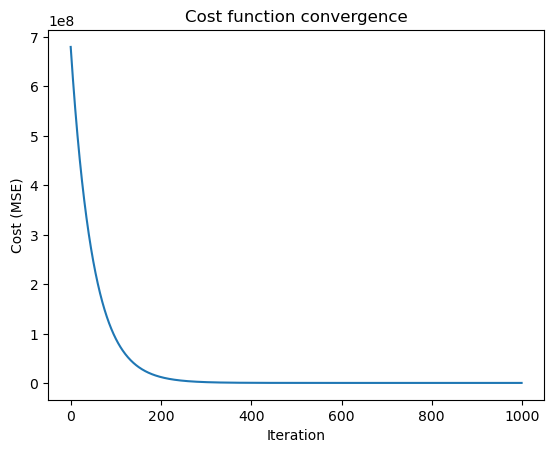

In [7]:
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost (MSE)")
plt.title("Cost function convergence")
plt.show()

In [8]:
# Example: predict life_cost for rent=15000, commute=60
x_new = np.array([15000, 60])
x_new_norm = (x_new - X_mean) / X_std
x_new_norm = np.hstack([1, x_new_norm])  # add intercept
predicted_cost = x_new_norm @ theta
print("Predicted life cost:", predicted_cost[0])

Predicted life cost: 32867.336887683545


In [9]:
print("Theta values:")
print(f"Intercept (base life cost): {theta[0][0]:.2f}")
print(f"Rent coefficient: {theta[1][0]:.2f} (effect per std unit of rent)")
print(f"Commute coefficient: {theta[2][0]:.2f} (effect per std unit of commute)")

# Optional: Convert back to original scale
rent_effect = theta[1][0] / X_std[0]
commute_effect = theta[2][0] / X_std[1]
print(f"Interpretation:")
print(f"1 ₹ increase in rent → life_cost increases by ~{rent_effect:.2f} ₹")
print(f"1 minute increase in commute → life_cost increases by ~{commute_effect:.2f} ₹")

Theta values:
Intercept (base life cost): 35383.99
Rent coefficient: 4844.99 (effect per std unit of rent)
Commute coefficient: 9801.04 (effect per std unit of commute)
Interpretation:
1 ₹ increase in rent → life_cost increases by ~1.01 ₹
1 minute increase in commute → life_cost increases by ~302.07 ₹


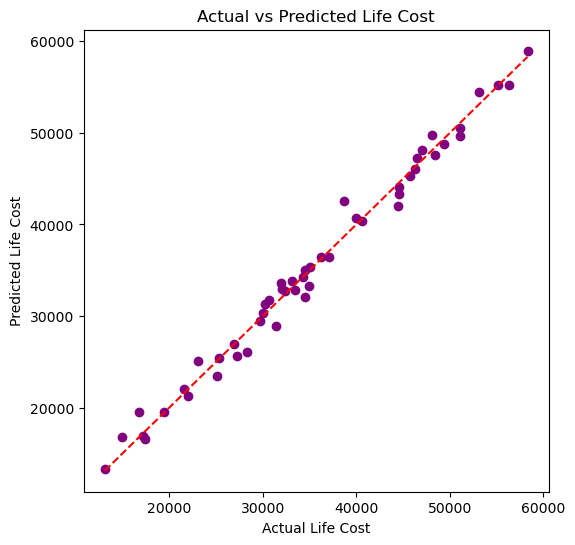

In [10]:
# Predictions for all samples
predictions = X_norm @ theta

plt.figure(figsize=(6,6))
plt.scatter(y, predictions, color='purple')
plt.xlabel("Actual Life Cost")
plt.ylabel("Predicted Life Cost")
plt.title("Actual vs Predicted Life Cost")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # perfect prediction line
plt.show()

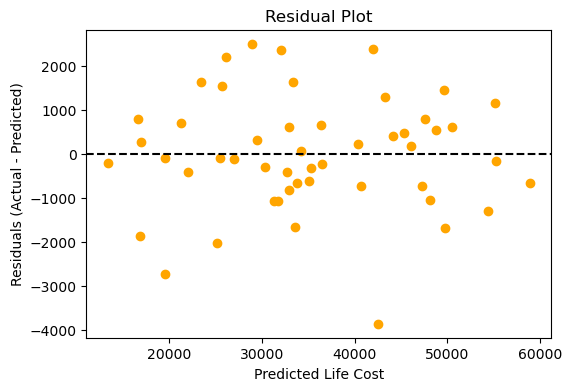

In [11]:
residuals = y - predictions

plt.figure(figsize=(6,4))
plt.scatter(predictions, residuals, color='orange')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Predicted Life Cost")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()

In [12]:
# X: original features
X = df[['rent', 'commute_minutes']].values

# Calculate mean and std for normalization
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)

print("X_mean:", X_mean)
print("X_std:", X_std)

# Theta: trained weights (from gradient descent)
print("Theta (normalized features):", theta.flatten())

# Convert theta to original scale (effect per 1 unit of rent/commute)
rent_effect = theta[1][0] / X_std[0]
commute_effect = theta[2][0] / X_std[1]
intercept_original_scale = theta[0][0] - (rent_effect * X_mean[0] + commute_effect * X_mean[1])

print("\n--- Parameters for Streamlit ---")
print(f"Intercept (base life cost): {intercept_original_scale:.2f}")
print(f"Rent coefficient (effect per ₹1): {rent_effect:.2f}")
print(f"Commute coefficient (effect per minute): {commute_effect:.2f}")

X_mean: [15756.58    65.8 ]
X_std: [4793.85917227   32.44626327]
Theta (normalized features): [35383.99236296  4844.99128381  9801.0408723 ]

--- Parameters for Streamlit ---
Intercept (base life cost): -416.85
Rent coefficient (effect per ₹1): 1.01
Commute coefficient (effect per minute): 302.07
